In [6]:
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

C:\Users\e1077926\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  if sys.path[0] == '':
C:\Users\e1077926\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app
C:\Users\e1077926\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


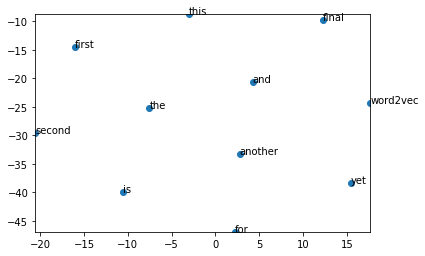

In [7]:
from gensim.models import Word2Vec

from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
            ['this', 'is', 'the', 'second', 'sentence'],
            ['yet', 'another', 'sentence'],
            ['one', 'more', 'sentence'],
            ['and', 'the', 'final', 'sentence']]
# train model
model_1 = Word2Vec(sentences, size=300, min_count=1)

display_closestwords_tsnescatterplot(model_1, 'this')


In [8]:
import gensim
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

model = r"C:\Users\e1077926\Documents\Sungard-India\Training\ML\Short courses\NLP\data\wiki-news-300d-1M.vec"

word_vectors = KeyedVectors.load_word2vec_format(model, binary=False)
print(word_vectors.wv.most_similar("vacation"))

C:\Users\e1077926\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


[('vacations', 0.8502235412597656), ('holiday', 0.7612416744232178), ('holidays', 0.7156026363372803), ('Vacation', 0.6945600509643555), ('vacationing', 0.6840166449546814), ('vacay', 0.6662922501564026), ('honeymoon', 0.6617687940597534), ('sabbatical', 0.659511148929596), ('vaction', 0.6581279039382935), ('busman', 0.6352845430374146)]


In [ ]:
from gensim.models import Word2Vec

sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
            ['this', 'is', 'the', 'second', 'sentence'],
            ['yet', 'another', 'sentence'],
            ['one', 'more', 'sentence'],
            ['and', 'the', 'final', 'sentence']]
min_count = 5

model_path = r"C:\Users\e1077926\Documents\Sungard-India\Training\ML\Short courses\NLP\data\wiki-news-300d-1M.vec"

pre_trained_model = KeyedVectors.load_word2vec_format(model_path, binary=False)

model = Word2Vec(size=300, min_count=min_count, iter=10)
model.build_vocab(sentences)
training_examples_count = model.corpus_count


model.build_vocab([list(pre_trained_model.vocab.keys())], update=True)
model.intersect_word2vec_format(model_path,binary=False, lockf=1.0)
model.train(sentences,total_examples=training_examples_count, epochs=model.iter)

new_model_path = r"C:\e1077926\ranadhir.ghosh\Documents\Sungard-India\Training\ML\Short courses\NLP\data\new_trained_model.bin"
model.wv.save_word2vec_format(new_model_path, binary=True)


In [ ]:
new_model_path = r"C:\Users\e1077926\Documents\Sungard-India\Training\ML\Short courses\NLP\data\new_trained_model.bin"
word_vectors = KeyedVectors.load_word2vec_format(new_model_path, binary=True)
print(word_vectors.wv.most_similar("sentence"))